In [2]:
# --- Imports and settings ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# --- Load your data ---
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
# --- Show missing values ---
def show_missing_values(df):
    total = df.isnull().sum()
    percent = (total / len(df)) * 100
    missing = pd.concat([total, percent], axis=1)
    missing.columns = ['Total Missing', 'Percent Missing']
    missing = missing[missing['Total Missing'] > 0].sort_values('Total Missing', ascending=False)
    print(missing)

show_missing_values(df)

              Total Missing  Percent Missing
PoolQC                 2909        99.657417
MiscFeature            2814        96.402878
Alley                  2721        93.216855
Fence                  2348        80.438506
MasVnrType             1766        60.500171
FireplaceQu            1420        48.646797
LotFrontage             486        16.649538
GarageQual              159         5.447071
GarageYrBlt             159         5.447071
GarageCond              159         5.447071
GarageFinish            159         5.447071
GarageType              157         5.378554
BsmtExposure             82         2.809181
BsmtCond                 82         2.809181
BsmtQual                 81         2.774923
BsmtFinType2             80         2.740665
BsmtFinType1             79         2.706406
MasVnrArea               23         0.787941
MSZoning                  4         0.137033
BsmtFullBath              2         0.068517
Functional                2         0.068517
BsmtHalfBa

In [5]:
# --- Handle missing values ---
def handle_missing_values(df):
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]):
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].fillna('None')
    return df

df_clean = handle_missing_values(df)
show_missing_values(df_clean)

Empty DataFrame
Columns: [Total Missing, Percent Missing]
Index: []


In [6]:
# --- Log-transform SalePrice ---
df_clean['SalePrice_log'] = np.log1p(df_clean['SalePrice'])

In [7]:
# --- Feature engineering ---
df_clean['TotalBathrooms'] = df_clean['FullBath'] + 0.5 * df_clean.get('HalfBath', 0)
df_clean['HasBasement'] = (df_clean['TotalBsmtSF'] > 0).astype(int)
df_clean['HouseAge'] = df_clean['YrSold'] - df_clean['YearBuilt']
df_clean['Remodeled'] = (df_clean['YearBuilt'] != df_clean['YearRemodAdd']).astype(int)

In [8]:
# --- One-hot encoding ---
df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [9]:
# --- Correlation analysis ---
corr_with_target = df_encoded.corr()['SalePrice_log'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:11].index  # Exclude SalePrice_log itself
print(top_features)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'TotalBathrooms', '1stFlrSF', 'HouseAge', 'YearBuilt'],
      dtype='object')


In [10]:
# --- Outlier removal ---
def remove_outliers_iqr(df, features):
    cleaned_df = df.copy()
    for feature in features:
        q1 = cleaned_df[feature].quantile(0.25)
        q3 = cleaned_df[feature].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower) & (cleaned_df[feature] <= upper)]
    return cleaned_df

outlier_features = ['GrLivArea', 'TotalBsmtSF', 'SalePrice_log']
df_no_outliers = remove_outliers_iqr(df_encoded, outlier_features)

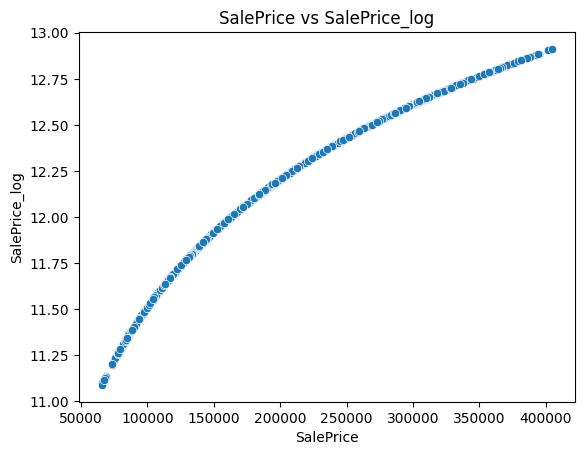

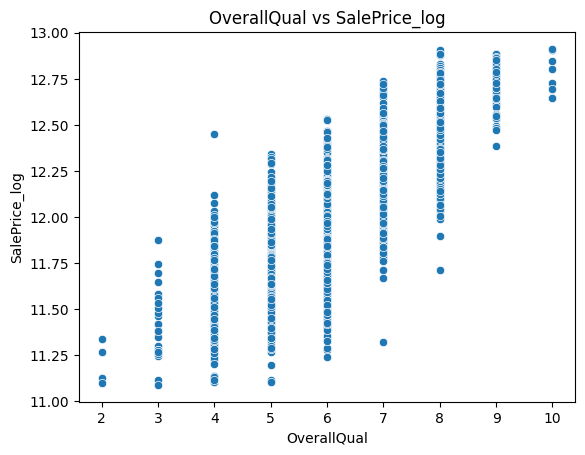

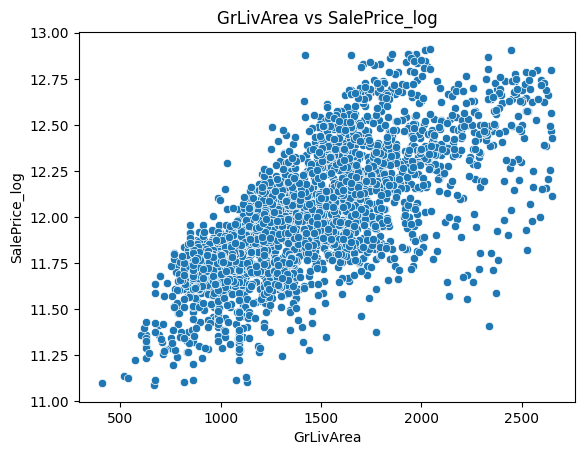

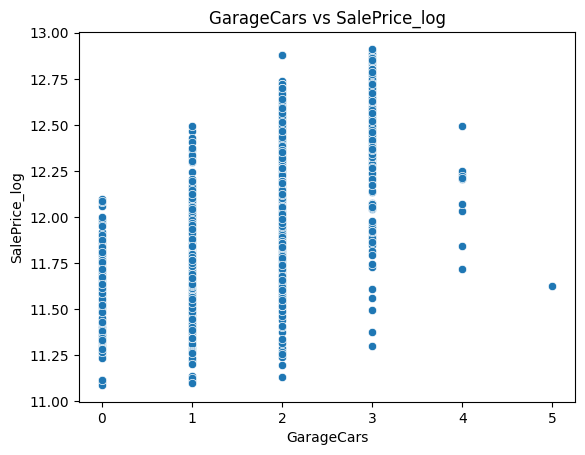

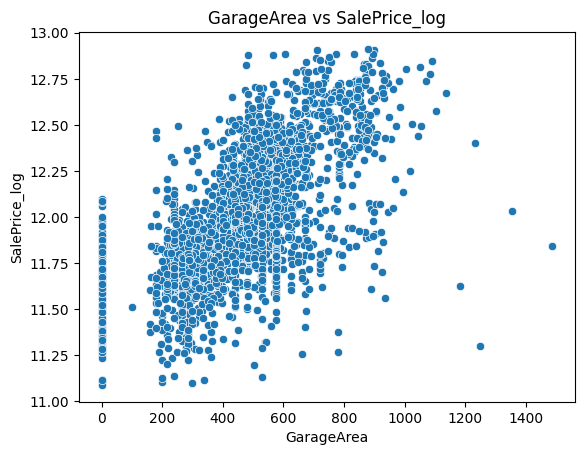

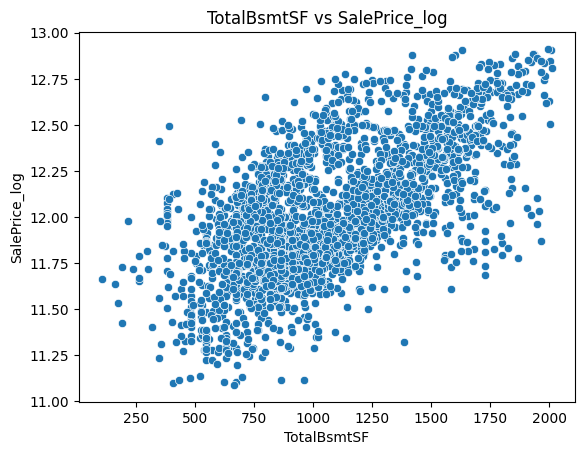

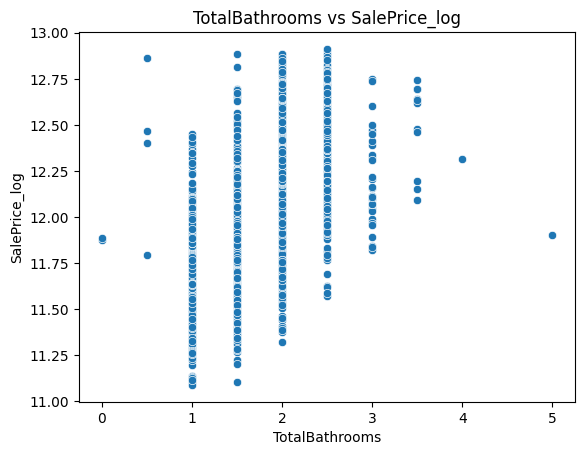

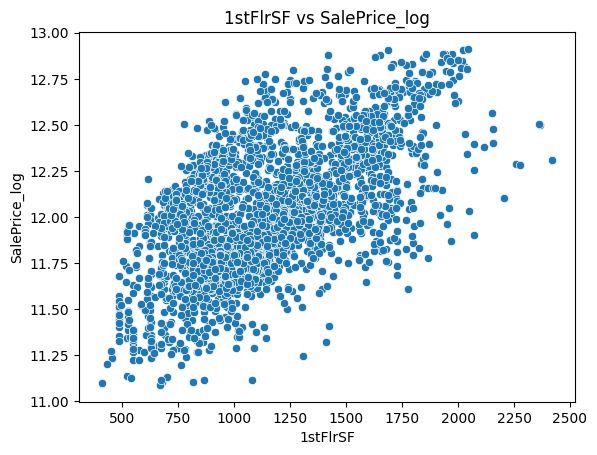

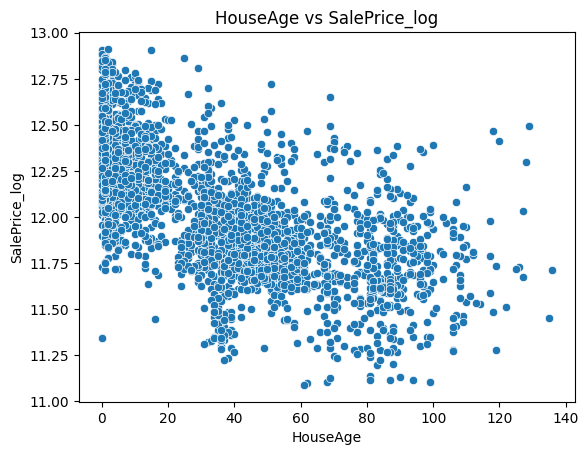

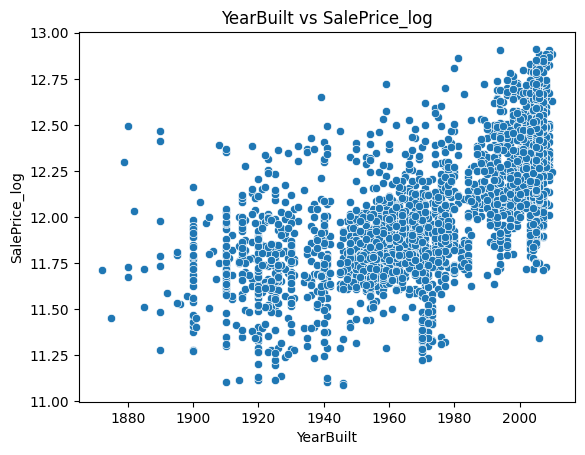

In [11]:
# --- Visualization: scatter plots for top features ---
for feature in top_features:
    if pd.api.types.is_numeric_dtype(df_no_outliers[feature]):
        sns.scatterplot(x=df_no_outliers[feature], y=df_no_outliers['SalePrice_log'])
        plt.title(f'{feature} vs SalePrice_log')
        plt.show()

In [12]:
# --- Model training and evaluation ---
X = df_no_outliers[top_features]
y = df_no_outliers['SalePrice_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2: 0.9646383336858166
Linear Regression RMSE: 0.060018010570918524


In [14]:
# Polynomial Regression
poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linreg', LinearRegression())
])
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))
print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))

Polynomial Regression R2: 0.9973233148952027
Polynomial Regression RMSE: 0.016512539744220258


In [15]:
# SGDRegressor with StandardScaler
sgd_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=1000, tol=1e-3, random_state=42))
])
sgd_pipe.fit(X_train, y_train)
y_pred_sgd = sgd_pipe.predict(X_test)
print("SGDRegressor R2:", r2_score(y_test, y_pred_sgd))
print("SGDRegressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sgd)))

SGDRegressor R2: 0.9634565912003993
SGDRegressor RMSE: 0.06101263238196452
